1.hiển thị toàn bộ dữ liệu

In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_csv(url):
  return pd.read_csv(url)

In [3]:
df=load_csv('/content/sample_data/P4AI_BT1.csv')

In [52]:
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety  \
0        5.100000     3.500000      1.400000      0.20000     Setosa   
1        4.900000     3.000000      3.719259      0.20000     Setosa   
2        4.700000     3.200000      1.300000      0.20000     Setosa   
3        4.600000     3.100000      1.500000      1.18963     Setosa   
4        5.000000     3.600000      1.400000      0.20000     Setosa   
..            ...          ...           ...          ...        ...   
145      6.700000     3.000000      5.200000      2.30000  Virginica   
146      6.300000     3.054815      5.000000      1.90000  Virginica   
147      5.852593     3.054815      5.200000      2.00000  Virginica   
148      5.852593     3.400000      3.719259      2.30000  Virginica   
149      5.900000     3.000000      5.100000      1.80000  Virginica   

    sepal_group  
0           nho  
1           nho  
2           nho  
3           nho  
4           nho  
..          ...  
145      

2.Filling mising data

In [5]:
df.isnull().sum()

sepal.length    15
sepal.width     15
petal.length    15
petal.width     15
variety         15
dtype: int64

In [11]:
def filling_miss(df):
  for column in df.columns:
    if df[column].dtype=='object':
      df[column]=df[column].fillna(df[column].mode()[0])
    else:
      df[column]=df[column].fillna(df[column].mean())
  return df

In [12]:
df_filled=filling_miss(df)
df_filled.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [13]:
df_filled

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.20000,Setosa
1,4.900000,3.000000,3.719259,0.20000,Setosa
2,4.700000,3.200000,1.300000,0.20000,Setosa
3,4.600000,3.100000,1.500000,1.18963,Setosa
4,5.000000,3.600000,1.400000,0.20000,Setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.30000,Virginica
146,6.300000,3.054815,5.000000,1.90000,Virginica
147,5.852593,3.054815,5.200000,2.00000,Virginica
148,5.852593,3.400000,3.719259,2.30000,Virginica


3.Hiển thị các bản ghi có sepal.length > 5 và sepal.width > 3

In [14]:
def hienthi(df):
  print(df[(df['sepal.length']>5) & (df['sepal.width']>3)])

In [15]:
hienthi(df_filled)

     sepal.length  sepal.width  petal.length  petal.width     variety
0        5.100000     3.500000      1.400000      0.20000      Setosa
5        5.400000     3.900000      1.700000      0.40000      Setosa
6        5.852593     3.400000      1.400000      0.30000      Setosa
7        5.852593     3.400000      1.500000      0.20000      Setosa
10       5.400000     3.700000      1.500000      0.20000      Setosa
14       5.800000     3.054815      1.200000      0.20000      Setosa
15       5.700000     4.400000      1.500000      1.18963      Setosa
16       5.400000     3.900000      1.300000      0.40000      Setosa
17       5.100000     3.500000      1.400000      0.30000   Virginica
18       5.700000     3.800000      1.700000      1.18963      Setosa
19       5.100000     3.800000      1.500000      0.30000      Setosa
20       5.400000     3.400000      3.719259      0.20000      Setosa
21       5.100000     3.700000      3.719259      0.40000      Setosa
23       5.100000   

In [16]:
X=df_filled.drop('variety',axis=1)
y=df_filled['variety']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

4. Chuẩn hóa dữ liệu theo min max

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

5. Liên tục hóa thuộc tính variety

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

6. Xây dựng mô hình hồi quy tuyến tính để đoán kết quả của thuộc tính

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,y_train_encoded)

LinearRegression()

In [23]:
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,r2_score
r2=r2_score(y_test_encoded,y_pred)
print(r2)
mse = mean_squared_error(y_test_encoded, y_pred)
print(mse)

0.7265632136123182
0.19565921159296334


7.Lấy mẫu ngẫu nhiên có lặp lại 50% dữ liệu

In [24]:
sampled_df = df_filled.sample(frac=0.5, replace=True)

In [25]:
sampled_df

,sepal.length,sepal.width,petal.length,petal.width,variety
47,5.852593,3.2,1.4,0.20000,Setosa
46,5.100000,3.8,1.6,0.20000,Setosa
128,6.400000,2.8,5.6,2.10000,Virginica
149,5.900000,3.0,5.1,1.80000,Virginica
80,5.500000,2.4,3.8,1.10000,Versicolor
...,...,...,...,...,...
71,6.100000,2.8,4.0,1.30000,Virginica
53,5.500000,2.3,4.0,1.18963,Versicolor
19,5.100000,3.8,1.5,0.30000,Setosa
3,4.600000,3.1,1.5,1.18963,Setosa


8. Rời rạc hóa thuộc tính sepal.length

In [26]:
df_filled['sepal.length'].describe()

count    150.000000
mean       5.852593
std        0.793922
min        4.300000
25%        5.200000
50%        5.852593
75%        6.375000
max        7.900000
Name: sepal.length, dtype: float64

<Axes: xlabel='sepal.length', ylabel='Count'>

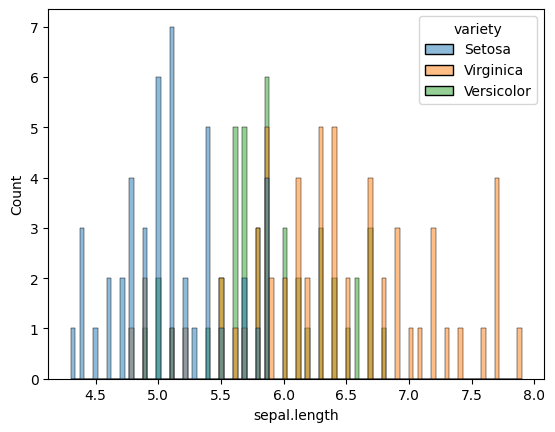

In [42]:
import seaborn as sns
sns.histplot(data=df_filled, x='sepal.length', hue='variety', bins=100)

<Axes: xlabel='variety', ylabel='sepal.length'>

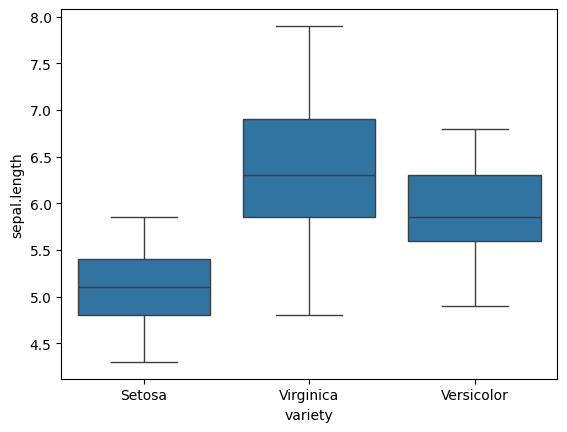

In [44]:
sns.boxplot(data=df_filled, x='variety', y='sepal.length')

In [46]:
X=df_filled[['sepal.length']]
y=df_filled['variety']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
thresholds = model.tree_.threshold
def roi_rac_hoa(length):
    if length <= thresholds[0]:
        return 'nho'
    elif thresholds[0] < length <= thresholds[1]:
        return 'trungbinh'
    else:
        return 'lon'

In [47]:
df['sepal_group'] = df['sepal.length'].apply(roi_rac_hoa)
print(df[['sepal.length', 'sepal_group']])

     sepal.length sepal_group
0        5.100000         nho
1        4.900000         nho
2        4.700000         nho
3        4.600000         nho
4        5.000000         nho
..            ...         ...
145      6.700000         lon
146      6.300000         lon
147      5.852593         lon
148      5.852593         lon
149      5.900000         lon

[150 rows x 2 columns]


9.tìm và loại bỏ ngoại lai

In [54]:
for column in df_filled.columns:
  if df_filled[column].dtype=='float64':
    Q1=df_filled[column].quantile(0.25)
    Q3=df_filled[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df_filled=df_filled[(df_filled[column]>=lower_bound)&(df_filled[column]<=upper_bound)]

<Axes: >

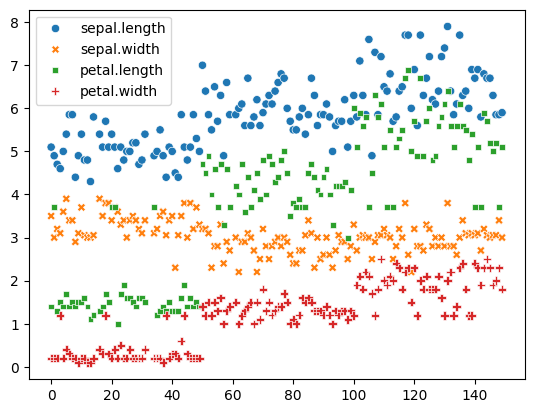

In [55]:
sns.scatterplot(data=df_filled)